Solves the Overfitting of linear regression
Also called as L1 regularization/Least Absolute Shrinkage and Selection Operator
L₁ = λ \* (|β₁| + |β₂| + … + |βₚ|) where λ:Tuning Parameter,
β₀, β₁, β₂, …, βₚ are the coefficients (parameters) to be estimated.
By adding the L1 regularization term, LASSO regression can shrink the coefficients towards zero. When λ is sufficiently large, some coefficients are driven to exactly zero.


This property of LASSO makes it useful for feature selection, as the variables with zero coefficients are effectively removed from the model.


The choice of the regularization parameter λ is crucial in LASSO regression. A larger λ value increases the amount of regularization, leading to more coefficients being pushed towards zero.

Conversely, a smaller λ value reduces the regularization effect, allowing more variables to have non-zero coefficients.


    λ denotes the amount of shrinkage.

    λ = 0 implies all features are considered and it is equivalent to the linear regression where only the residual sum of squares is considered to build a predictive model

    λ = ∞ implies no feature is considered i.e, as λ closes to infinity it eliminates more and more features

    The bias increases with an increase in λ

    Variance increases with a decrease in λ


LASSO regression offers a powerful framework for both prediction and feature selection, especially when dealing with high-dimensional datasets where the number of features is large


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Reports/50_Startups.csv")

In [2]:
x = df.drop(columns=["Profit"])
y = df["Profit"]

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Unique values in each column


In [4]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
Profit             50
dtype: int64

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [6]:
print("score on test data", lr.score(x_test, y_test))
print("score on training data", lr.score(x_train, y_train))

score on test data 0.9355188337118219
score on training data 0.9515391457049143


In [7]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=200, max_iter=100, tol=0.01)
lasso.fit(x_train, y_train)

Lasso(alpha=200, max_iter=100, tol=0.01)

Ridge/L2 regularisation


In [8]:
y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)

In [9]:
print("Lasso Regression Coefficients:", lasso.coef_)
print("Lasso Regression Intercept:", lasso.intercept_)

Lasso Regression Coefficients: [0.79045994 0.03114347 0.03137187]
Lasso Regression Intercept: 42448.590782122075


In [10]:
print("score of test data", lasso.score(x_test, y_test))
print("score of training data", lasso.score(x_train, y_train))

score of test data 0.9355189777337539
score of training data 0.9515391457046624


In [11]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_score(y_train, y_pred_train)

0.9515391457046624

In [12]:
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error of test data: ", mae_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error of train data: ", mae_train)

Mean Absolute Error of test data:  6489.654608023206
Mean Absolute Error of train data:  6616.229950702579


In [13]:
mse_test = np.mean((y_test - y_pred_test) ** 2)
print("Mean Squared Error of test data: ", mse_test)
mse_train = np.mean((y_train - y_pred_train) ** 2)
print("Mean Squared Error of train data: ", mse_train)

Mean Squared Error of test data:  62240130.82613811
Mean Squared Error of train data:  89657314.14965105


In [14]:
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Error of train data: ", rmse_train)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error of test data: ", rmse_test)

Root Mean Squared Error of train data:  9468.754625062953
Root Mean Squared Error of test data:  7889.241460757688


In [15]:
adj_r2_test = 1 - (
    (1 - r2_score(y_test, y_pred_test))
    * (len(x_test) - 1)
    / (len(x_test) - x_test.shape[1] - 1)
)
print("Adjusted R2 Score of test data: ", adj_r2_test)
adj_r2_train = 1 - (
    (1 - r2_score(y_train, y_pred_train))
    * (len(x_train) - 1)
    / (len(x_train) - x_train.shape[1] - 1)
)
print("Adjusted R2 Score of train data: ", adj_r2_train)

Adjusted R2 Score of test data:  0.9179332443884141
Adjusted R2 Score of train data:  0.9468493856115652


In [16]:
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=200, max_iter=100, tol=0.01)
Ridge.fit(x_train, y_train)

Ridge(alpha=200, max_iter=100, tol=0.01)

In [17]:
y_train_pred = Ridge.predict(x_train)
y_test_pred = Ridge.predict(x_test)

In [18]:
print("Ridge Regression Coefficients:", Ridge.coef_)
print("Ridge Regression Intercept:", Ridge.intercept_)

Ridge Regression Coefficients: [0.79045925 0.03114407 0.03137206]
Ridge Regression Intercept: 42448.528423302065


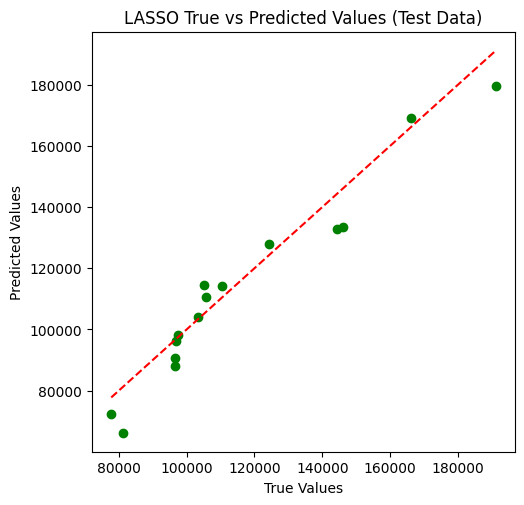

In [19]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_test, color="green")
plt.title("LASSO True vs Predicted Values (Test Data)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--"
)

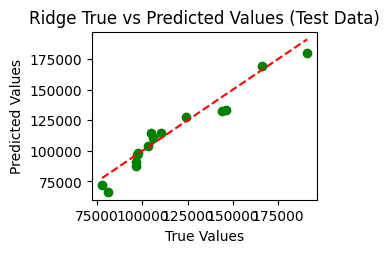

In [21]:
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_test_pred, color="green")
plt.title("Ridge True vs Predicted Values (Test Data)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--"
)

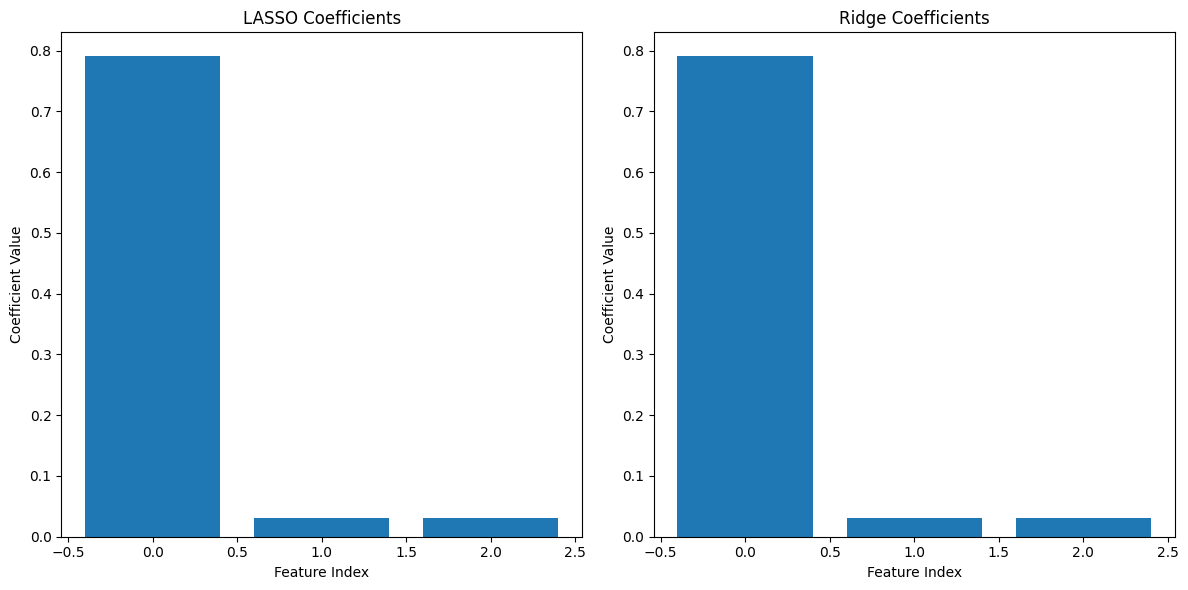

In [22]:
# Plot LASSO coefficients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.title("LASSO Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")

# Plot Ridge coefficients
plt.subplot(1, 2, 2)
plt.bar(range(len(Ridge.coef_)), Ridge.coef_)
plt.title("Ridge Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")

plt.tight_layout()
plt.show()